In [ ]:
N = 100000
row = [0] * 56 + [1] * 56
row *= 2

In [ ]:
row = [255 * b for b in row]

In [ ]:
tile = [row for _ in range(56)]

In [ ]:
anti_row = [255 - b for b in row]
anti_tile = [anti_row for _ in range(56)]

In [ ]:
tile.extend(anti_tile)
tile *= 2

In [ ]:
tile = [tile for _ in range(3)]

In [ ]:
!git clone https://github.com/google-research/big_vision

Cloning into 'big_vision'...
remote: Enumerating objects: 1266, done.
remote: Counting objects: 100% (777/777), done.
remote: Compressing objects: 100% (351/351), done.
remote: Total 1266 (delta 516), reused 515 (delta 400), pack-reused 489
Receiving objects: 100% (1266/1266), 4.39 MiB | 4.90 MiB/s, done.
Resolving deltas: 100% (693/693), done.


In [ ]:
import tensorflow as tf

In [ ]:
tf_tile = tf.constant(tile, dtype=tf.uint8)

In [ ]:
tf_tile = tf.transpose(tf_tile, perm=(1, 2, 0))

In [ ]:
tf_tile.shape

TensorShape([224, 224, 3])

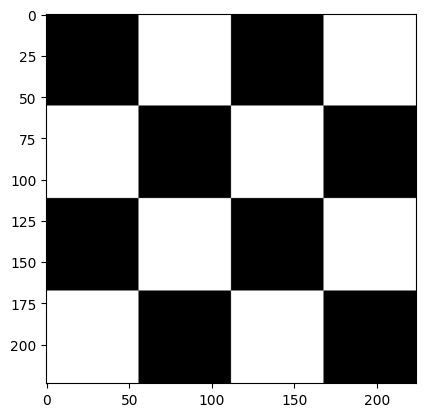

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(tf_tile)

In [ ]:
import importlib
!pip3 install tensorflow_addons
m = importlib.import_module(f"big_vision.big_vision.pp.autoaugment")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 3.4 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


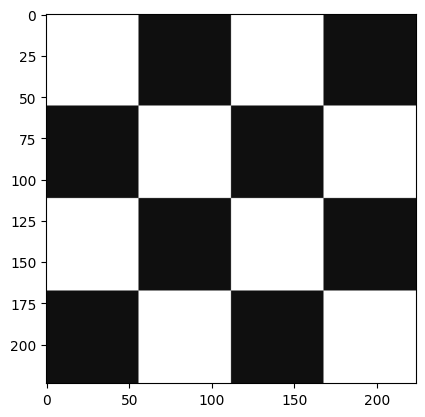

In [ ]:
out = m.distort_image_with_randaugment(tf_tile, 2, 10)
plt.imshow(out)

In [ ]:
import collections

In [ ]:
import tqdm

In [ ]:
tf_counter = collections.Counter()
for _ in tqdm.tqdm(range(N)):
  out = m.distort_image_with_randaugment(tf_tile, 2, 10)
  tf_counter.update(tuple(pixel) for row in out.numpy() for pixel in row)

  0%|          | 0/100000 [00:00<?, ?it/s]WARNING:tensorflow:From /usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.
100%|██████████| 100000/100000 [3:32:50<00:00,  7.83it/s]


In [ ]:
all(k[0] == k[1] == k[2] for k in tf_counter.keys())

True

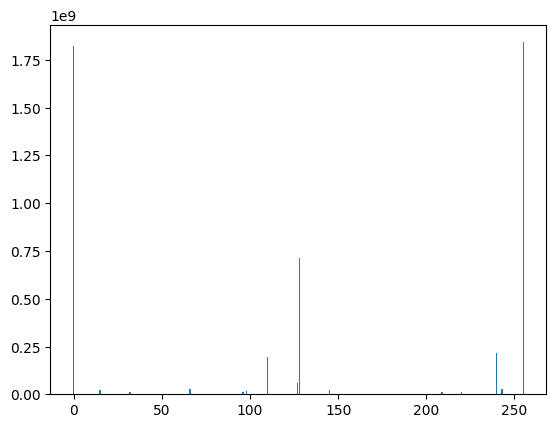

In [ ]:
plt.bar([k[0] for k in tf_counter.keys()], tf_counter.values())
plt.show()

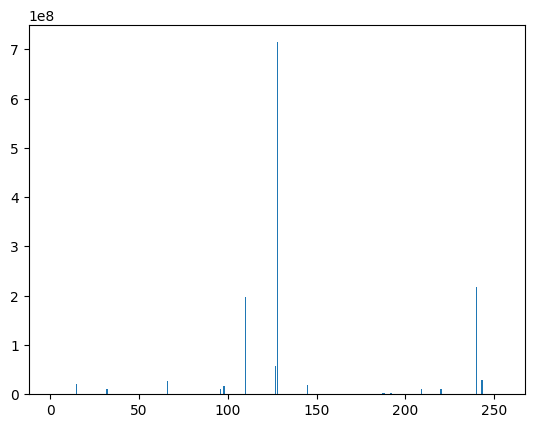

In [ ]:
plt.bar(range(1, 255), [tf_counter[(i, i, i)] for i in range(1, 255)])
plt.show()

In [ ]:
tf_counter

Counter({(0, 0, 0): 1822737431,
         (255, 255, 255): 1842426210,
         (128, 128, 128): 714368785,
         (220, 220, 220): 10689714,
         (127, 127, 127): 56486751,
         (110, 110, 110): 197108571,
         (145, 145, 145): 19794432,
         (164, 164, 164): 49428,
         (155, 155, 155): 167247,
         (146, 146, 146): 50574,
         (137, 137, 137): 64224,
         (92, 92, 92): 49388,
         (101, 101, 101): 169829,
         (119, 119, 119): 64157,
         (240, 240, 240): 218237258,
         (173, 173, 173): 473,
         (84, 84, 84): 478,
         (66, 66, 66): 27916988,
         (32, 32, 32): 9959936,
         (192, 192, 192): 2956576,
         (96, 96, 96): 10010112,
         (243, 243, 243): 28654651,
         (188, 188, 188): 3111760,
         (80, 80, 80): 492480,
         (70, 70, 70): 6840,
         (15, 15, 15): 19869696,
         (209, 209, 209): 10171364,
         (98, 98, 98): 17449600,
         (187, 187, 187): 2626400,
         (213, 213, 2

In [ ]:
import torch

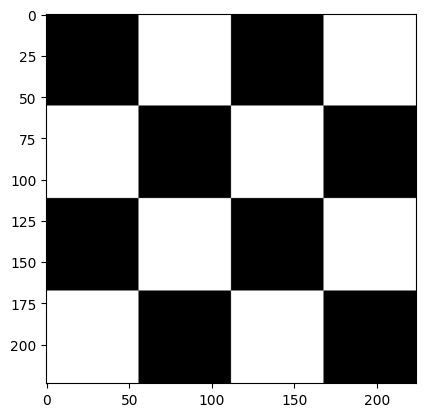

In [ ]:
torch_tile = torch.Tensor(tile).to(torch.uint8)
plt.imshow(torch_tile.permute(1, 2, 0))

In [ ]:
from torchvision.transforms import v2

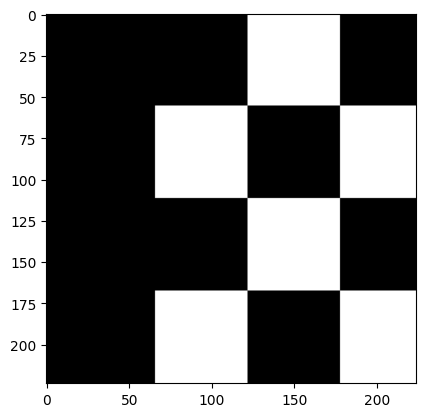

In [ ]:
transform = v2.RandAugment(2, 10)
out = transform(torch_tile)
plt.imshow(out.permute(1, 2, 0))

In [ ]:
torch_counter = collections.Counter()
for _ in tqdm.tqdm(range(N)):
  out = transform(torch_tile)
  torch_counter.update(tuple(pixel) for row in out.permute(1, 2, 0).numpy() for pixel in row)

100%|██████████| 100000/100000 [2:30:08<00:00, 11.10it/s]


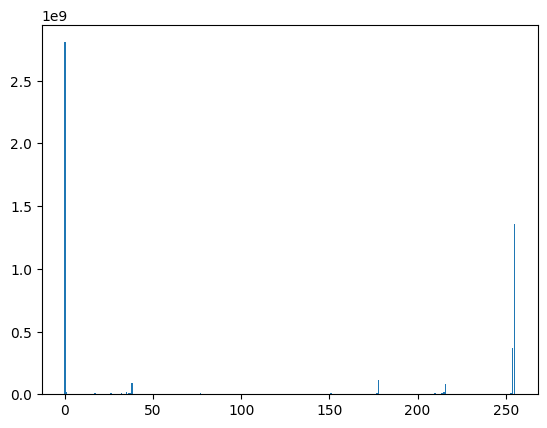

In [ ]:
plt.bar([k[0] for k in torch_counter.keys()], torch_counter.values())
plt.show()

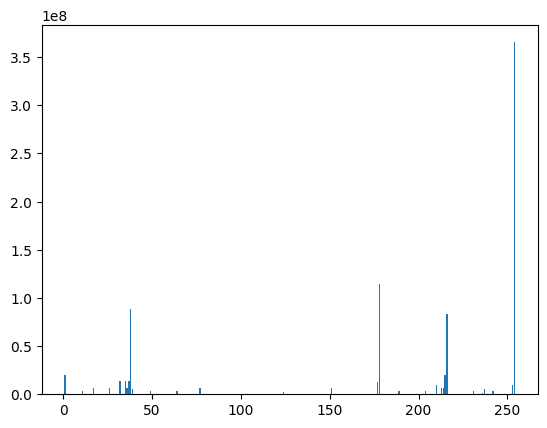

In [ ]:
plt.bar(range(1, 255), [torch_counter[(i, i, i)] for i in range(1, 255)])
plt.show()

In [ ]:
torch_counter

Counter({(0, 0, 0): 2805231902,
         (255, 255, 255): 1358486472,
         (254, 254, 254): 365481466,
         (177, 177, 177): 12819968,
         (178, 178, 178): 114701526,
         (38, 38, 38): 88778956,
         (216, 216, 216): 83030036,
         (17, 17, 17): 6524954,
         (237, 237, 237): 5644633,
         (23, 23, 23): 190534,
         (231, 231, 231): 3600734,
         (35, 35, 35): 14253876,
         (214, 214, 214): 6256320,
         (25, 25, 25): 202176,
         (228, 228, 228): 202176,
         (21, 21, 21): 2808,
         (232, 232, 232): 2808,
         (26, 26, 26): 6447616,
         (151, 151, 151): 6447616,
         (32, 32, 32): 13442128,
         (210, 210, 210): 9990064,
         (49, 49, 49): 3310128,
         (2, 2, 2): 185022,
         (251, 251, 251): 182736,
         (4, 4, 4): 2538,
         (249, 249, 249): 102429,
         (236, 236, 236): 1110672,
         (230, 230, 230): 15426,
         (1, 1, 1): 19626784,
         (124, 124, 124): 2634240,
  

In [ ]:
mid_fill_transform = v2.RandAugment(2, 10, fill=[128] * 3)
torch_mid_fill_counter = collections.Counter()
for _ in tqdm.tqdm(range(N)):
  out = mid_fill_transform(torch_tile)
  torch_mid_fill_counter.update(tuple(pixel) for row in out.permute(1, 2, 0).numpy() for pixel in row)

100%|██████████| 100000/100000 [2:30:41<00:00, 11.06it/s]


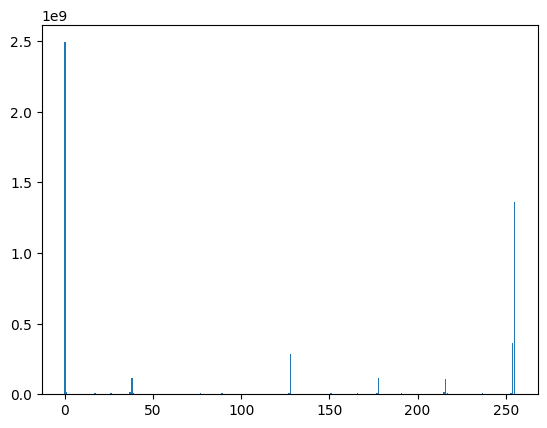

In [ ]:
plt.bar([k[0] for k in torch_mid_fill_counter.keys()], torch_mid_fill_counter.values())
plt.show()

In [ ]:
torch_mid_fill_counter

Counter({(128, 128, 128): 283712442,
         (0, 0, 0): 2490944591,
         (255, 255, 255): 1358923850,
         (127, 127, 127): 11714748,
         (38, 38, 38): 114028300,
         (216, 216, 216): 107856960,
         (17, 17, 17): 6362113,
         (237, 237, 237): 5572814,
         (23, 23, 23): 183391,
         (231, 231, 231): 4664861,
         (254, 254, 254): 364276458,
         (236, 236, 236): 1017360,
         (230, 230, 230): 14130,
         (178, 178, 178): 112517216,
         (89, 89, 89): 5880312,
         (1, 1, 1): 19587968,
         (246, 246, 246): 133196,
         (136, 136, 136): 129836,
         (234, 234, 234): 3406,
         (131, 131, 131): 33660,
         (20, 20, 20): 3441,
         (125, 125, 125): 33707,
         (8, 8, 8): 133406,
         (119, 119, 119): 261794,
         (37, 37, 37): 19169012,
         (5, 5, 5): 105687,
         (243, 243, 243): 110932,
         (252, 252, 252): 16866,
         (249, 249, 249): 108333,
         (133, 133, 133): 1316

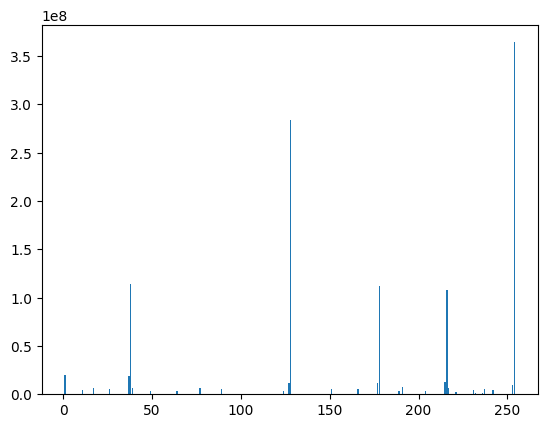

In [ ]:
plt.bar(range(1, 255), [torch_mid_fill_counter[(i, i, i)] for i in range(1, 255)])
plt.show()